#**LOGISTIC REGRESSION MODEL TRAINING - Class 2**


> In this notebook the Logisitc Regresson model was trained based on Attack class 2 Input and the evalation of the model has been done using several evalustion techniques.






## **Importing Required Libraries**

**Importing Required Libraries**

In [ ]:
!pip install tensorflow
!pip install psutil
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install tqdm
!pip install keras
!pip install sklearn
!pip install time
!pip install json

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [9]:
import gc
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from matplotlib.colors import LinearSegmentedColormap
from keras.utils import to_categorical
import pandas as pd
import time
import json
import joblib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Logistic Regression Model Creation and Training

*   Importing the preprocessed and reshaped dataset from the local directory
*   Defining the Logistic Regression Model.
*   Training the Logistic Regression model.


In [3]:
file_path = "<preprocessedrnn_data.npz file location for Class 2>"
# file_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Preprocessed data/preprocessed_logistic_data2.npz"

In [4]:
save_path = "<Enter the save path>"
# save_file = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Result"

In [6]:
# Logistic Regression Model
def create_logistic_regression_model():
    """Create a Logistic Regression model."""
    model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
    return model

# Training the model
def train_logistic_regression_model(model, X_train, y_train_encoded, X_val, y_val_encoded):
    """Train Logistic Regression model."""
    model.fit(X_train, y_train_encoded)
    y_val_pred = model.predict(X_val)

    print("Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred))
    print("Classification Report (Validation Data):")
    print(classification_report(y_val_encoded, y_val_pred))

    return model


data = np.load(file_path, allow_pickle=True)
# Retriving the Preprocessed data
X_train = data["X_train1"]
X_val = data["X_val1"]
X_test = data["X_test1"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
label_classes = data["label_classes"]

label_encoder = LabelEncoder()
label_encoder.classes_ = label_classes

# Create the logistic regression model
log_reg_model = create_logistic_regression_model()

# Train the model
train_logistic_regression_model(log_reg_model, X_train, y_train.argmax(axis=1), X_val, y_val.argmax(axis=1))

# Evaluate on test data
y_test_pred = log_reg_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test.argmax(axis=1), y_test_pred))
print("Classification Report (Test Data):")
print(classification_report(y_test.argmax(axis=1), y_test_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.9991544282196141
Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     38516
           1       1.00      1.00      1.00   1393651

    accuracy                           1.00   1432167
   macro avg       0.99      1.00      0.99   1432167
weighted avg       1.00      1.00      1.00   1432167

Test Accuracy: 0.9992020726287371
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37607
           1       1.00      1.00      1.00   1576575

    accuracy                           1.00   1614182
   macro avg       0.99      1.00      0.99   1614182
weighted avg       1.00      1.00      1.00   1614182



## Result Analysis

*   In this section the result has been analysed with the help various evalution matrices.
*   Several graphical representation of the results has been done.


### Calculating Loss, Accuracy, and Classification Report

In [7]:
y_test_pred_prob = log_reg_model.predict_proba(X_test)

# Log loss computation (cross-entropy loss)
loss = log_loss(y_test, y_test_pred_prob)

# Print the loss
print(f"Logistic Regression Test Loss (Cross-Entropy Loss): {loss:.4f}")

# Predict on the test set using Logistic Regression
y_test_pred = log_reg_model.predict(X_test)
# Decode the predictions
y_pred = y_test_pred

# Decode true labels from one-hot encoding
y_test_true_encoded = np.argmax(y_test, axis=1)

# Calculate accuracy (optional)
accuracy = accuracy_score(y_test_true_encoded, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report (Test Data):")
print(classification_report(y_test_true_encoded, y_pred))


Logistic Regression Test Loss (Cross-Entropy Loss): 0.0028
Test Accuracy: 0.9992
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37607
           1       1.00      1.00      1.00   1576575

    accuracy                           1.00   1614182
   macro avg       0.99      1.00      0.99   1614182
weighted avg       1.00      1.00      1.00   1614182



### Confusion Matrix


Confusion Matrix:
 [[  37353     254]
 [   1034 1575541]]

 



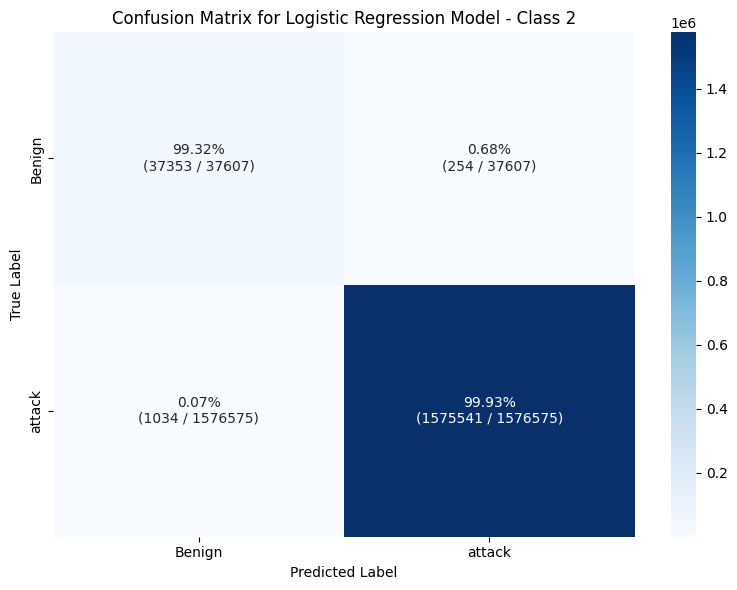

In [10]:
# Load label_classes from preprocessing file
label_classes = data["label_classes"]

# Compute the confusion matrix
cm = confusion_matrix(y_test_true_encoded, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\n \n")

# Normalize the confusion matrix by rows (i.e., true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Prepare annotations with both counts and percentages
annot = np.empty_like(cm, dtype=object)
row_sums = cm.sum(axis=1)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        total = row_sums[i]
        percent = cm_normalized[i, j] * 100 if total != 0 else 0
        annot[i, j] = f"{percent:.2f}%\n({count} / {total})" if total != 0 else "—"

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=annot,
            fmt='',
            cmap='Blues',
            xticklabels=label_classes,
            yticklabels=label_classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model - Class 2')
plt.tight_layout()
plt.show()


## Evaluating and Saving the Model

*   Saving the evaluated model as.json file for future analysis



In [12]:
# Save the model
model_filename = 'Logistic_2.h5'

# Combine them into a full path
full_save_path = os.path.join(save_file, model_filename)

# Save the model
joblib.dump(log_reg_model, full_save_path)


['/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Result/Logistic_2.h5']

In [18]:
# Evaluate the model and save detailed metrics for comparison
def evaluate(model, X_test, y_test, save_path, model_name):

    # Record the start time of evaluation
    start_eval = time.time()

    # Make predictions
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)  # Accuracy calculation for logistic regression

    # Record the end time and calculate how long evaluation took
    end_eval = time.time()
    eval_time = end_eval - start_eval

    # Classification Metrics
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store all results in a dictionary
    results = {
        "model_name": "Logistic Regression",  # Update with your model name if needed
        "accuracy": float(accuracy),
        "precision": float(precision),
        "recall": float(recall),
        "f1_score": float(f1),
        "loss": float(loss),
        "evaluation_time_sec": float(eval_time),
        "confusion_matrix": conf_matrix.tolist(),
        "true_labels": y_test.tolist(),
        "predicted_labels": y_pred.tolist()
    }

    # Save results to JSON
    with open(save_path, "w") as f:
        json.dump(results, f)

    print(f"Results saved successfully to {save_path}")

file_name = "results_regression2.json"
save_path = os.path.join(save_file, file_name)
# Logistic Regression model evaluation and saving results
evaluate(
    model=log_reg_model,
    X_test=X_test,
    y_test=y_test.argmax(axis=1),
    model_name="Logistic Regression",# Ensure y_test is in class indices
    save_path=save_path
)


Results saved successfully to /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_2/Result/results_regression2.json
